In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset
data = pd.read_csv('StudentsPerformance.csv')

# Intial Data Exploration

In [3]:
# Showing the Top 5 Rows of the Dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Showing the Last 5 Rows of the Dataset
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Describing the Data including the Categorical Columns
data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [7]:
# Checking which columns contain null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Checking for any Duplicate Entries
data.duplicated().any()

False

In [9]:
# Checking for missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# Check for duplicate rows
data.duplicated().sum()

0

In [11]:
# Quick overview of the dataset
print("Dataset Overview:")
print("Shape of the dataset:", data.shape)
print("\nColumns and Data Types:")
print(data.dtypes)

Dataset Overview:
Shape of the dataset: (1000, 8)

Columns and Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [12]:
# Separate summary statistics for numerical and categorical data
print("\nNumerical Features Summary:\n", data.describe())
print("\nCategorical Features Summary:\n", data.describe(include=['object']))


Numerical Features Summary:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Categorical Features Summary:
         gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq              

# Preprocessing

In [13]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [14]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [15]:
data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [16]:
data['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [17]:
data['test preparation course'] = data['test preparation course'].replace('none', 'not completed')
data['test preparation course']

0      not completed
1          completed
2      not completed
3      not completed
4      not completed
           ...      
995        completed
996    not completed
997        completed
998        completed
999    not completed
Name: test preparation course, Length: 1000, dtype: object

# Exploratory Data Analysis

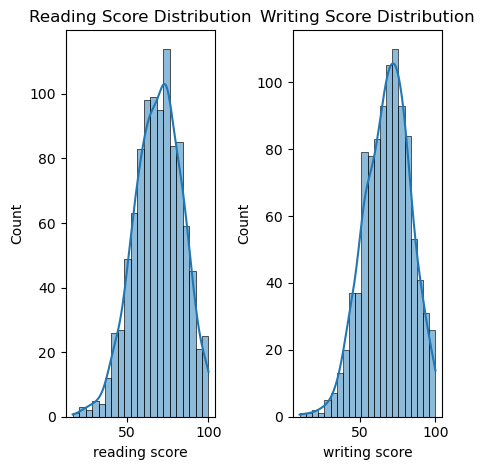

In [18]:
# Reading Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(data, x='reading score', kde=True)
plt.title('Reading Score Distribution')

# Writing Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(data, x='writing score', kde=True)
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

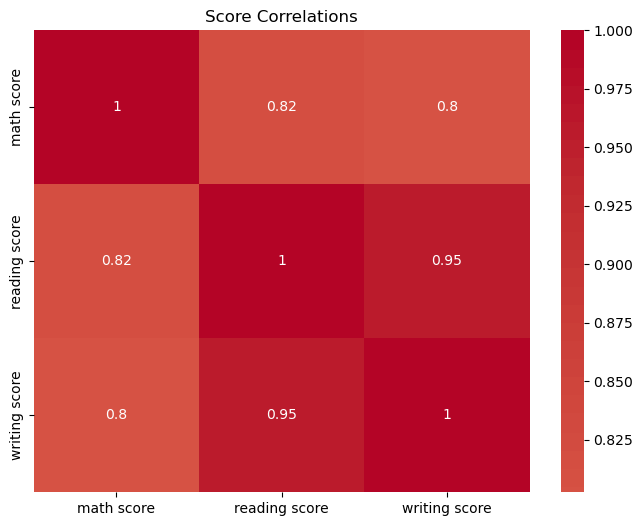

In [19]:
# 5. Score Correlation Analysis
plt.figure(figsize=(8, 6))
correlation_matrix = data[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Score Correlations')
plt.show()

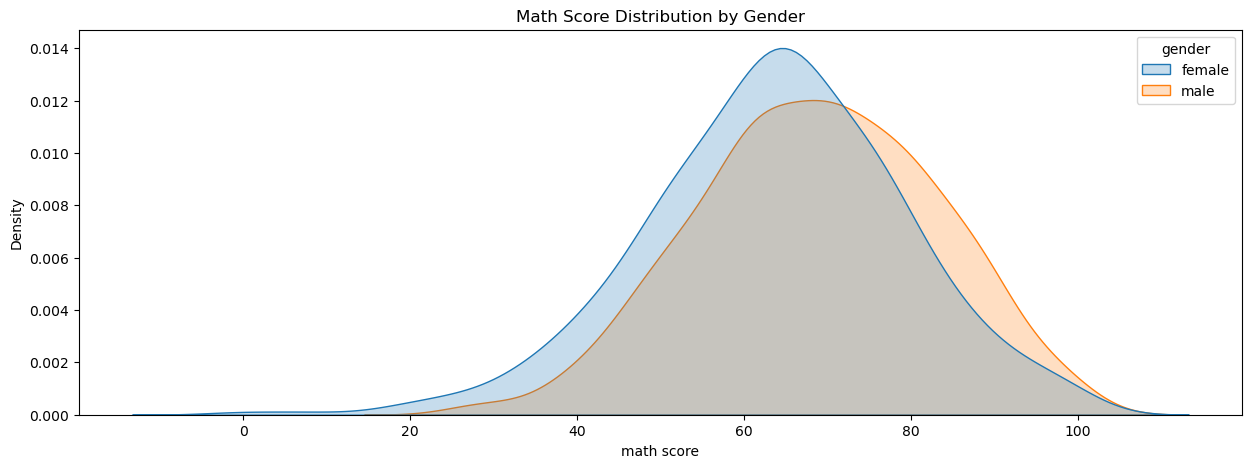

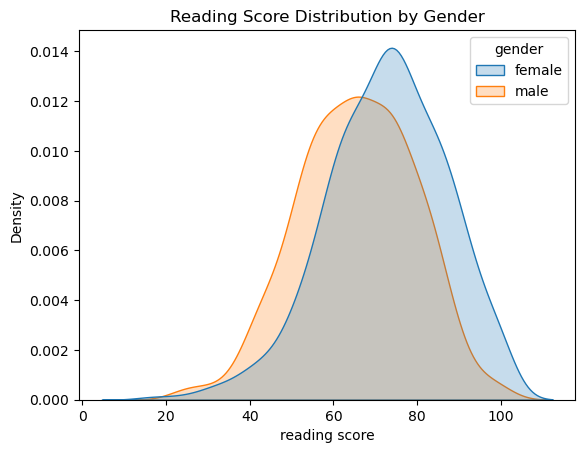

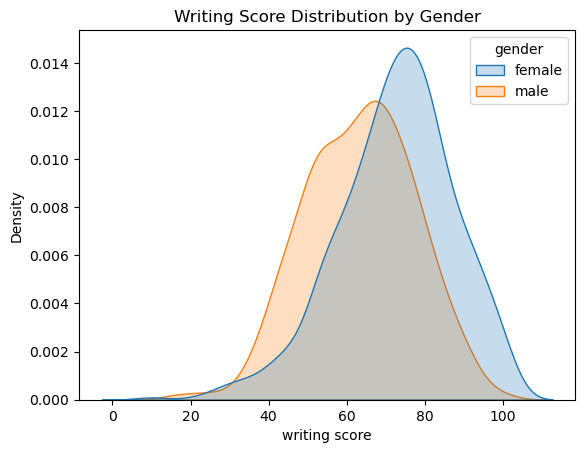

In [20]:
# Kernel Density Estimation (KDE) plot to analyze score distributions by gender
plt.figure(figsize=(15, 5))

sns.kdeplot(data=data, x='math score', hue='gender', fill=True)
plt.title("Math Score Distribution by Gender")
plt.show()

sns.kdeplot(data=data, x='reading score', hue='gender', fill=True)
plt.title("Reading Score Distribution by Gender")
plt.show()

sns.kdeplot(data=data, x='writing score', hue='gender', fill=True)
plt.title("Writing Score Distribution by Gender")
plt.show()


C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


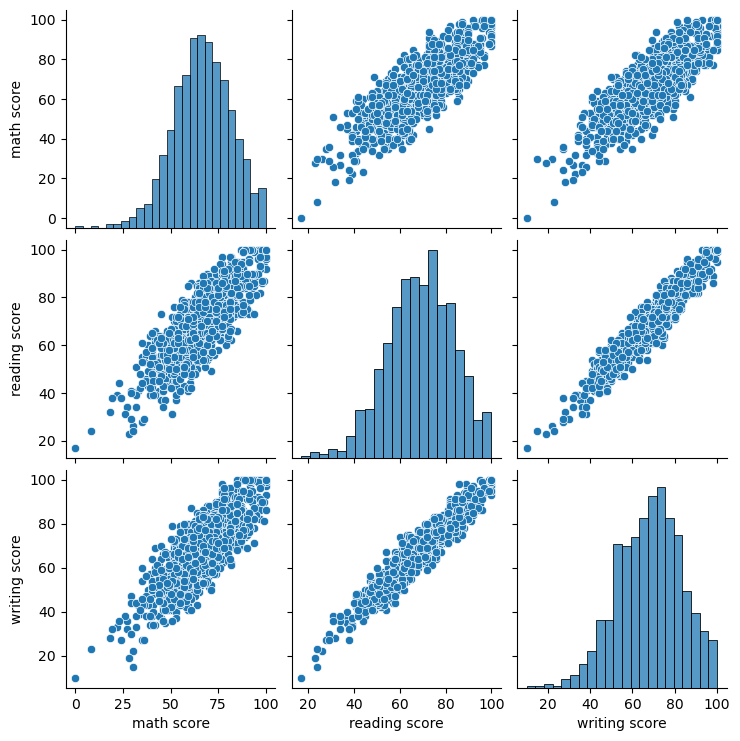

In [21]:
# Plotting the Pairplot of Math Score, Reading Score and Writing Score
sns.pairplot(data[['math score', 'reading score', 'writing score']])
plt.show()

C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

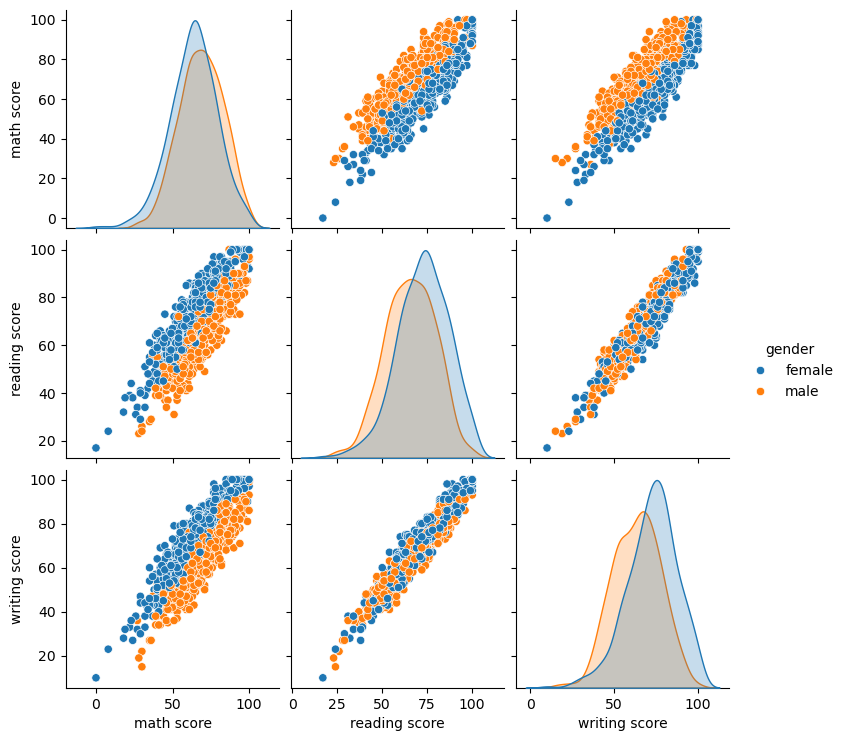

In [22]:
plt.figure(figsize=(12, 8))
pairplot = sns.pairplot(data, hue='gender')
plt.show()

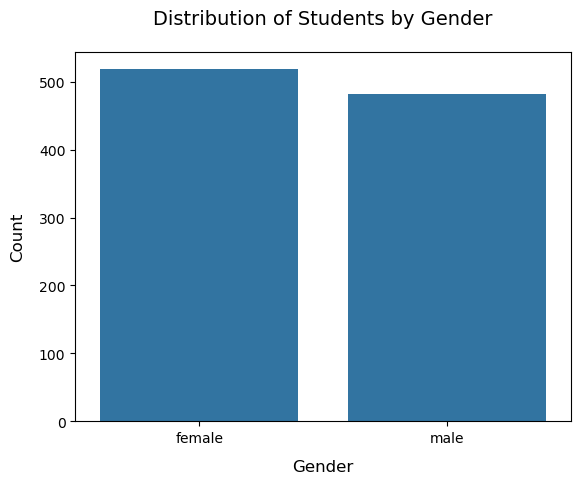

In [23]:
# Countplot of Gender Column
# Create count plot
sns.countplot(data, x='gender')
# Customize the plot
plt.title('Distribution of Students by Gender', pad=20, size=14)
plt.xlabel('Gender', labelpad=10, size=12)
plt.ylabel('Count', labelpad=10, size=12)
plt.show()

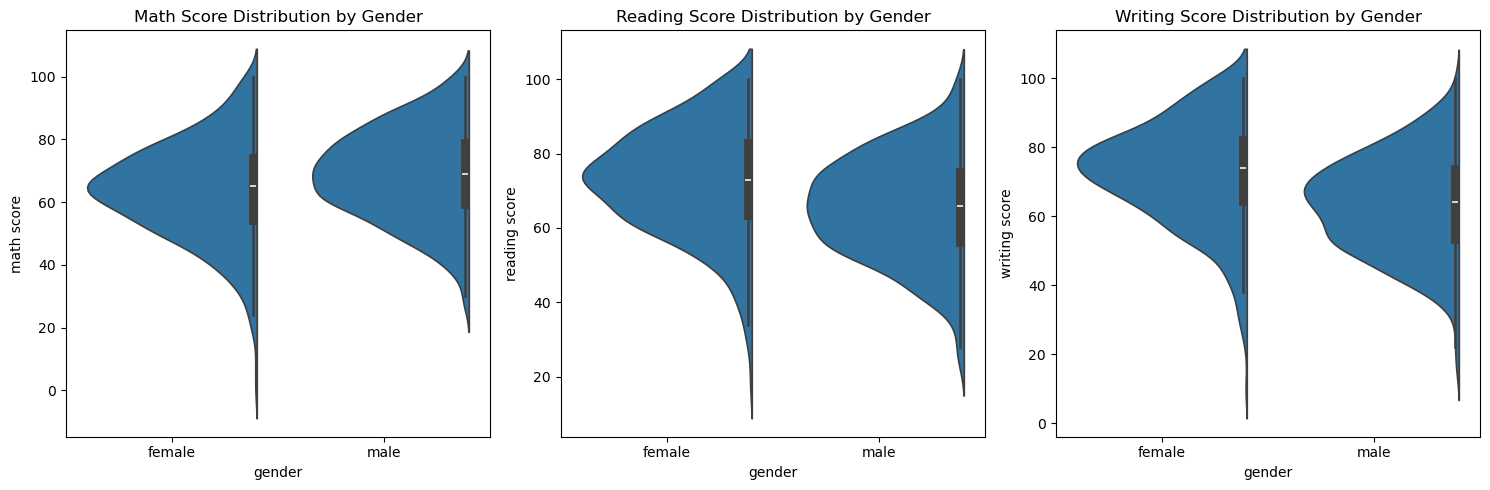

In [24]:
# Violin plots to visualize the distribution of scores by gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.violinplot(data=data, x='gender', y='math score', split=True)
plt.title("Math Score Distribution by Gender")

plt.subplot(1, 3, 2)
sns.violinplot(data=data, x='gender', y='reading score', split=True)
plt.title("Reading Score Distribution by Gender")

plt.subplot(1, 3, 3)
sns.violinplot(data=data, x='gender', y='writing score', split=True)
plt.title("Writing Score Distribution by Gender")

plt.tight_layout()
plt.show()

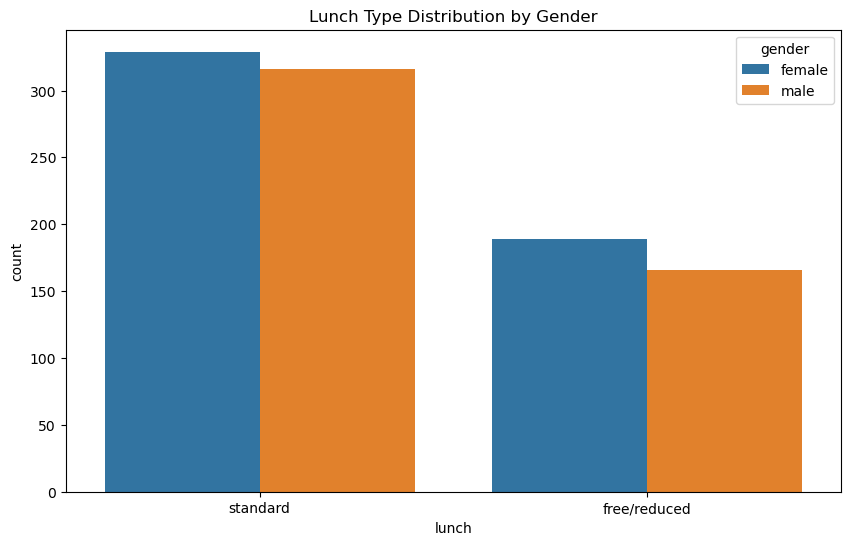

In [25]:
# Clustered bar plot to explore interactions between gender and lunch type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='lunch', hue='gender')
plt.title("Lunch Type Distribution by Gender")
plt.show()

In [26]:
# Calculate and display percentages
total = len(data)
gender_counts = data['gender'].value_counts()
gender_percentages = (gender_counts / total * 100)
print(gender_counts)
print(gender_percentages)

gender
female    518
male      482
Name: count, dtype: int64
gender
female    51.8
male      48.2
Name: count, dtype: float64


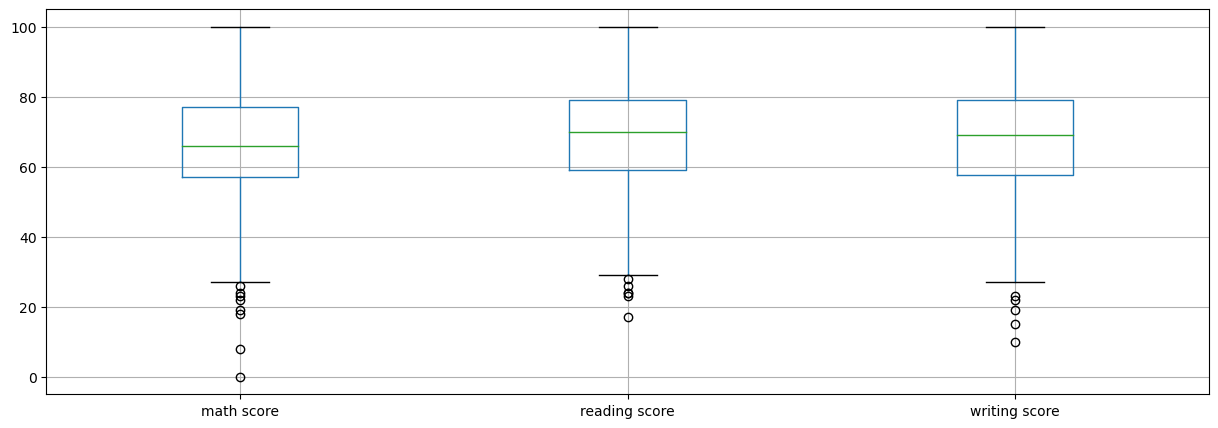

In [27]:
# Plotting the Box Plot of Dataset
plt.figure(figsize = (15,5))
data.boxplot();

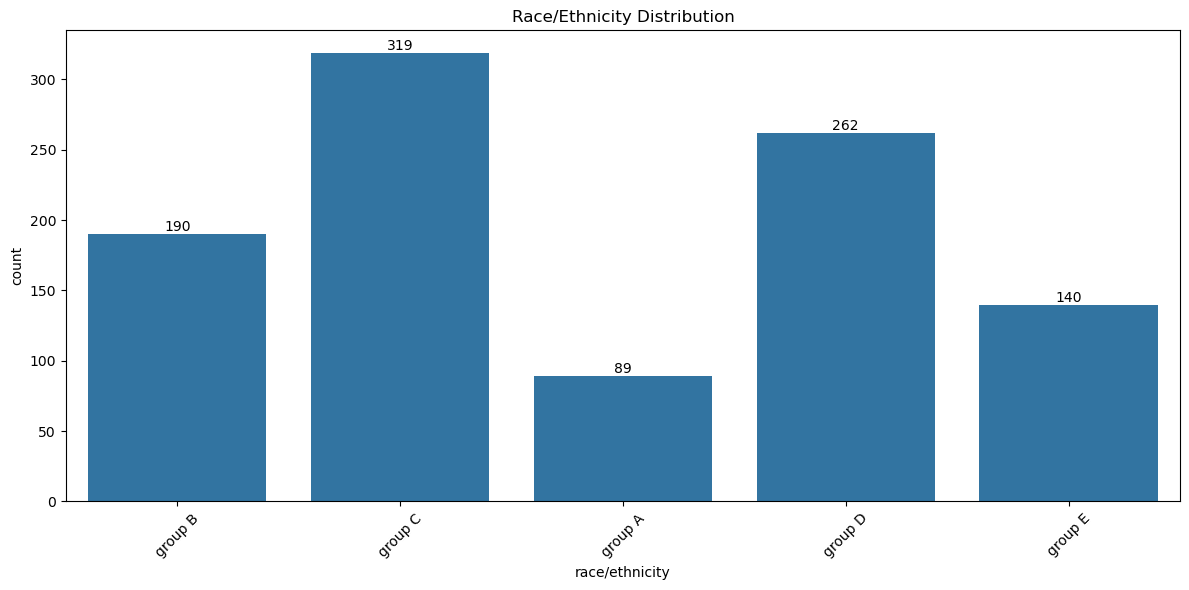


Race/Ethnicity Distribution:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Race/Ethnicity Percentages:
race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64


In [28]:
# 6. Race/Ethnicity Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data, x='race/ethnicity')
plt.title('Race/Ethnicity Distribution')
plt.xticks(rotation=45)
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.tight_layout()
plt.show()

print("\nRace/Ethnicity Distribution:")
print(data['race/ethnicity'].value_counts())
print("\nRace/Ethnicity Percentages:")
print((data['race/ethnicity'].value_counts(normalize=True) * 100).round(2))

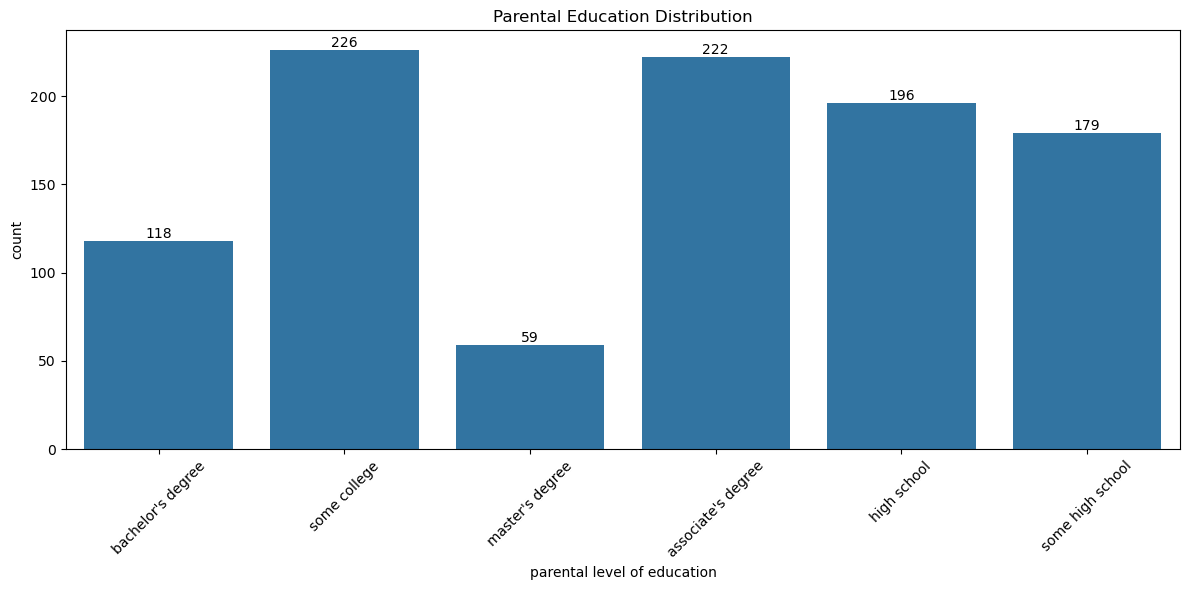


Parental Education Distribution:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Parental Education Percentages:
parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64


In [29]:
# 7. Parental Education Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data, x='parental level of education')
plt.title('Parental Education Distribution')
plt.xticks(rotation=45)
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.tight_layout()
plt.show()

print("\nParental Education Distribution:")
print(data['parental level of education'].value_counts())
print("\nParental Education Percentages:")
print((data['parental level of education'].value_counts(normalize=True) * 100).round(2))

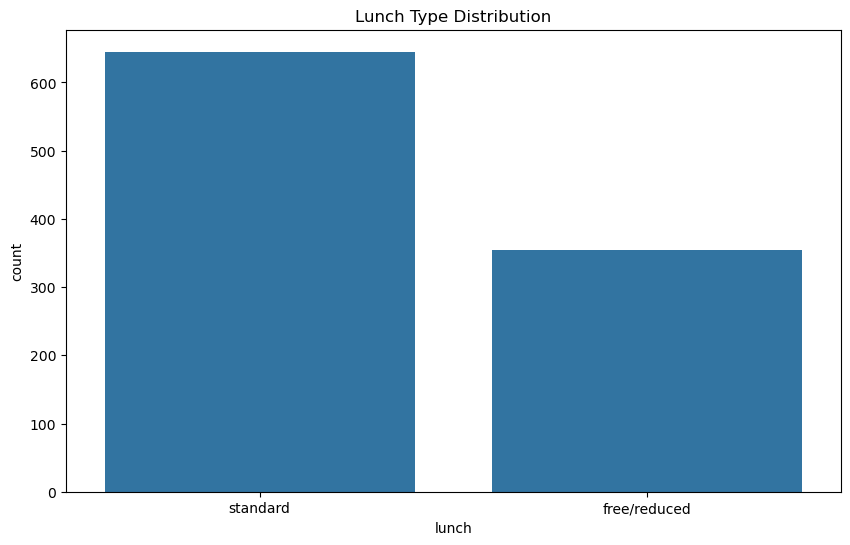


Lunch Type Distribution:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Lunch Type Percentages:
lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64


In [30]:
# 8. Lunch Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data, x='lunch')
plt.title('Lunch Type Distribution')
plt.show()


print("\nLunch Type Distribution:")
print(data['lunch'].value_counts())
print("\nLunch Type Percentages:")
print((data['lunch'].value_counts(normalize=True) * 100))

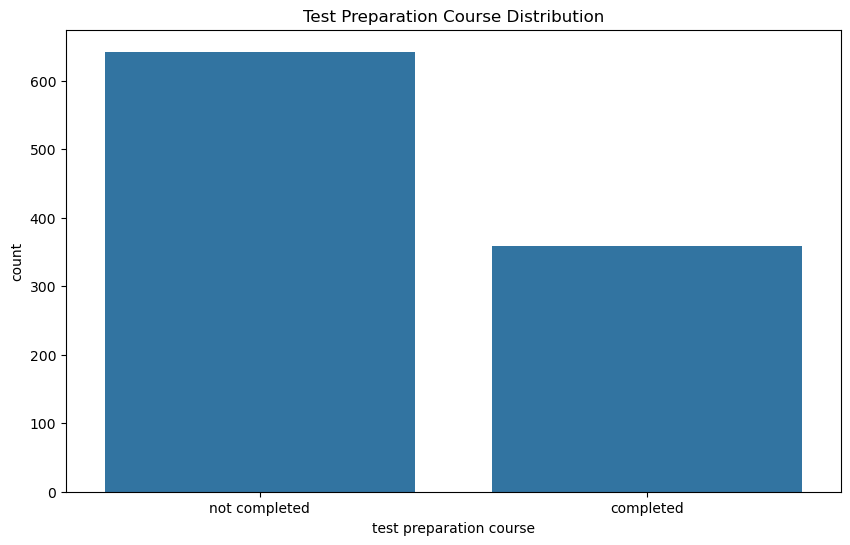


Test Preparation Distribution:
test preparation course
not completed    642
completed        358
Name: count, dtype: int64

Test Preparation Percentages:
test preparation course
not completed    64.2
completed        35.8
Name: proportion, dtype: float64


In [31]:
# 9. Test Preparation Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data, x='test preparation course')
plt.title('Test Preparation Course Distribution')
plt.show()

print("\nTest Preparation Distribution:")
print(data['test preparation course'].value_counts())
print("\nTest Preparation Percentages:")
print((data['test preparation course'].value_counts(normalize=True) * 100))

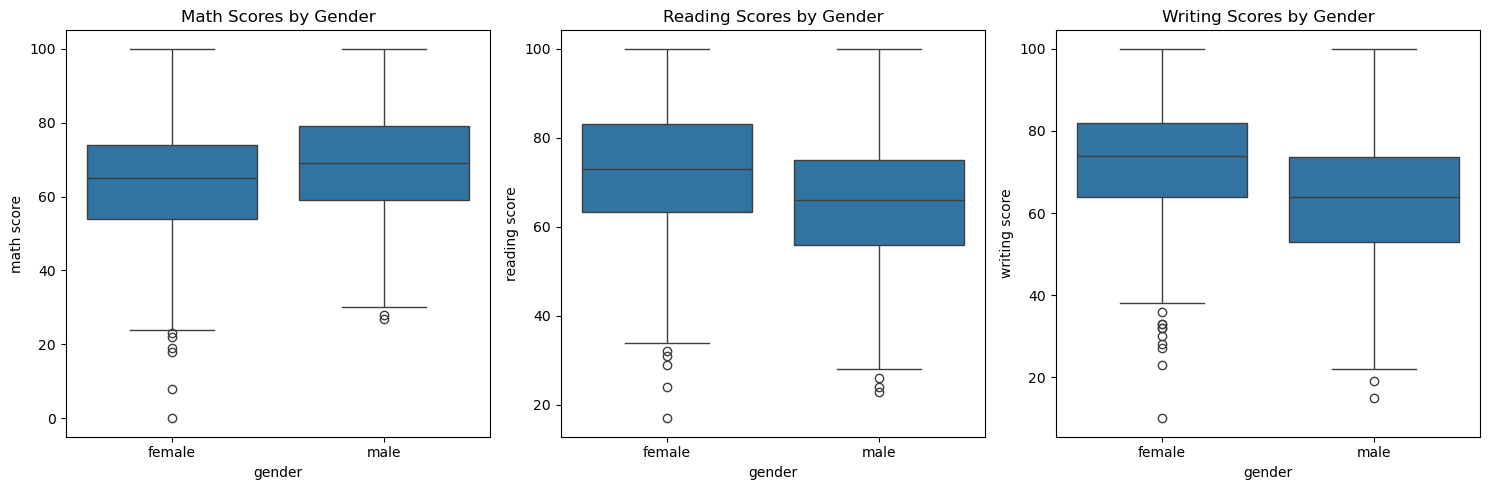

In [32]:
# 10. Score Distribution by Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data, x='gender', y='math score')
plt.title('Math Scores by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(data, x='gender', y='reading score')
plt.title('Reading Scores by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(data, x='gender', y='writing score')
plt.title('Writing Scores by Gender')

plt.tight_layout()
plt.show()

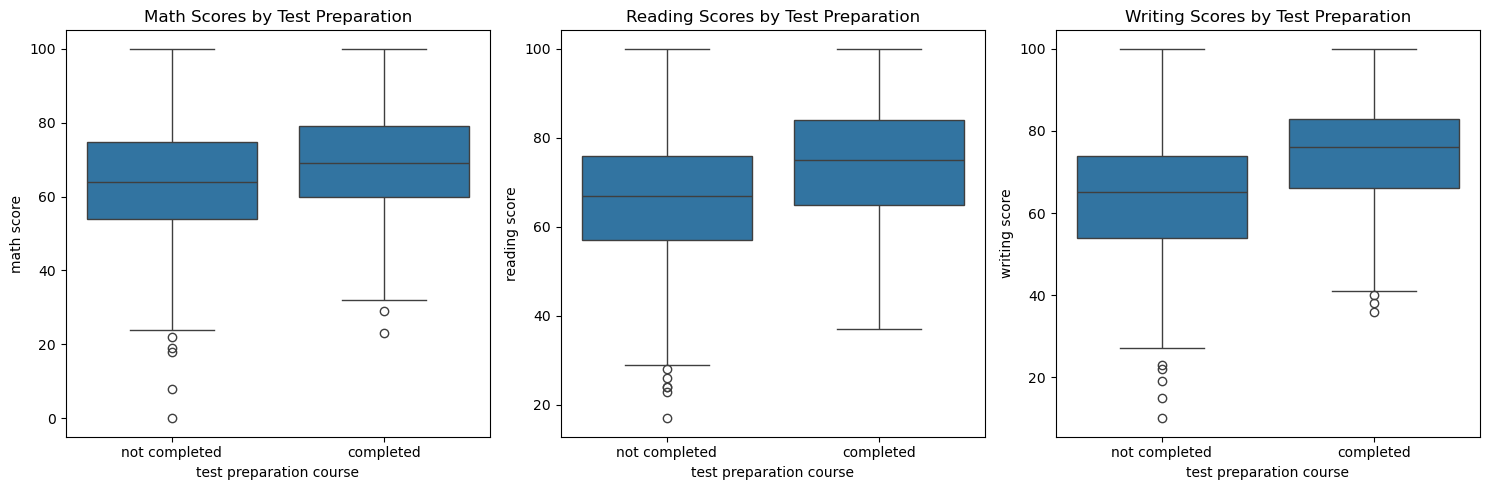

In [33]:
# 11. Score Distribution by Test Preparation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data, x='test preparation course', y='math score')
plt.title('Math Scores by Test Preparation')

plt.subplot(1, 3, 2)
sns.boxplot(data, x='test preparation course', y='reading score')
plt.title('Reading Scores by Test Preparation')

plt.subplot(1, 3, 3)
sns.boxplot(data, x='test preparation course', y='writing score')
plt.title('Writing Scores by Test Preparation')

plt.tight_layout()
plt.show()

In [34]:
# Converting Categorical Columns to Numerics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = data.copy()
data_encoded["gender"] = le.fit_transform(data["gender"])
data_encoded["race/ethnicity"] = le.fit_transform(data["race/ethnicity"])
data_encoded["parental level of education"] = le.fit_transform(data["parental level of education"])
data_encoded["lunch"] = le.fit_transform(data["lunch"])
data_encoded["test preparation course"] = le.fit_transform(data["test preparation course"])
data_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


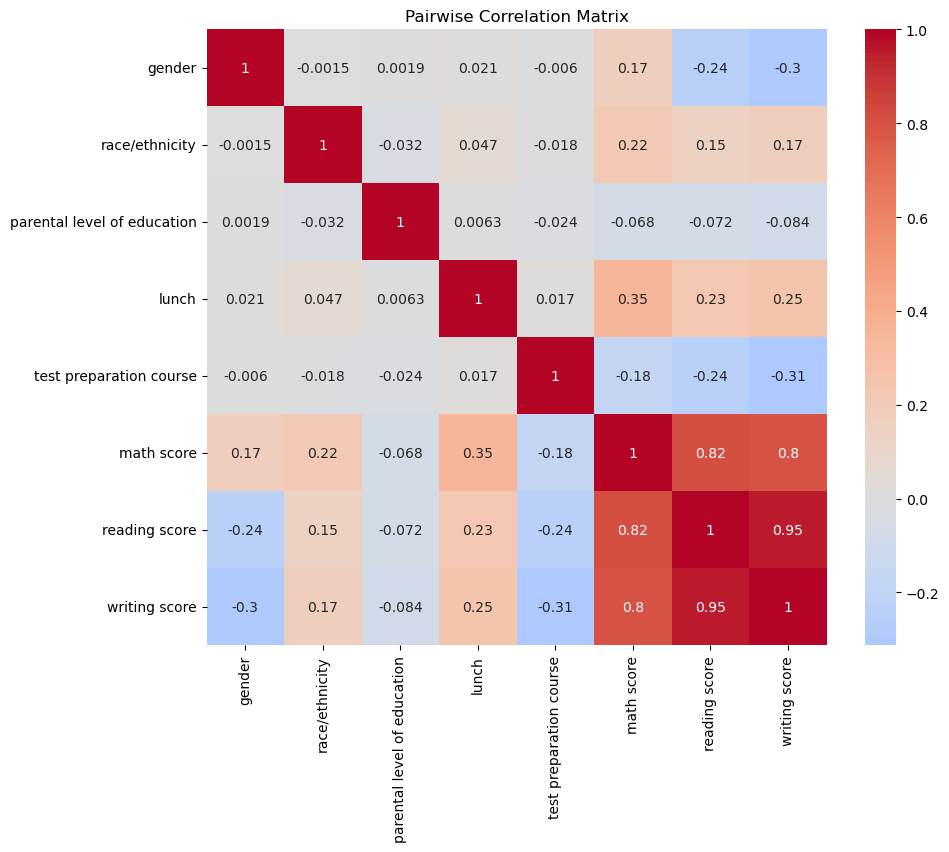

In [35]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Pairwise Correlation Matrix")
plt.show()

In [36]:
# Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data_encoded.iloc[:,[5,6,7]].values
X = scaler.fit_transform(X)

# K-Means Clustering

C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

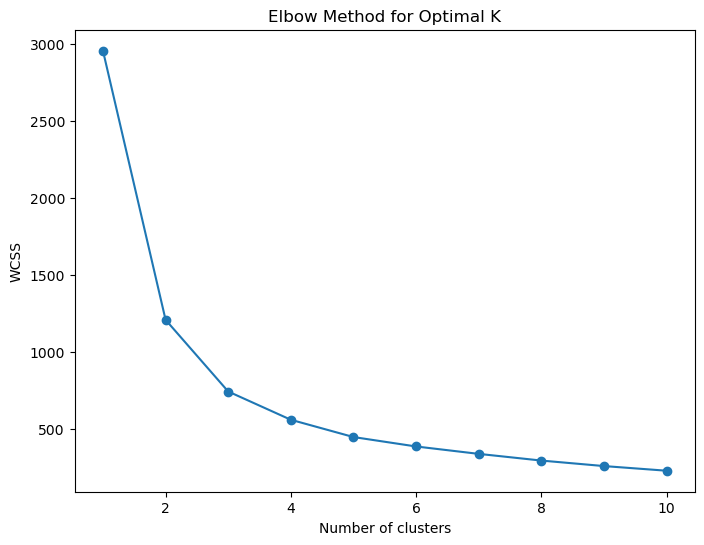

In [68]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Applying PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [69]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_pca)

C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


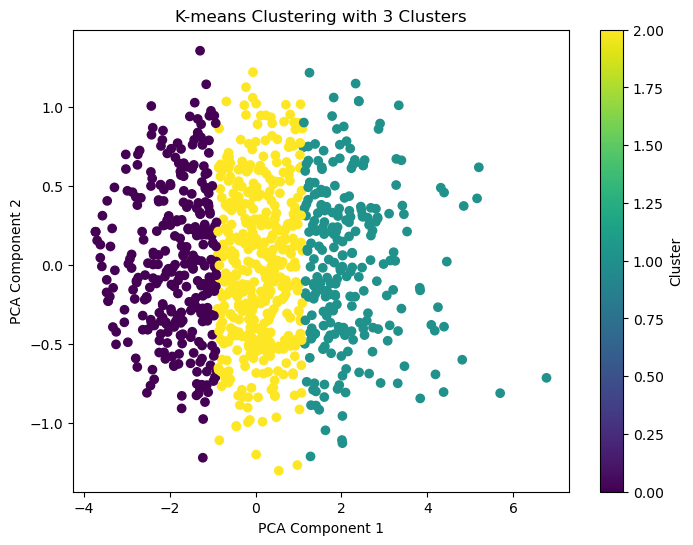

In [70]:
# Adding the cluster labels to the PCA-transformed data for visualization
data_pca_clustered = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_clustered['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_clustered['PCA1'], data_pca_clustered['PCA2'], c=data_pca_clustered['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with 3 Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [71]:
data_pca_clustered.head(10)

,PCA1,PCA2,Cluster
0,-0.560514,0.088285,2
1,-1.719201,-0.910745,0
2,-2.883135,-0.021999,0
3,2.119921,-0.074994,1
4,-0.988094,0.131914,0
5,-1.123100,-0.349250,0
6,-2.771296,-0.103735,0
7,3.135228,0.025667,1
8,0.326128,0.042207,2
9,2.096265,-0.810073,1


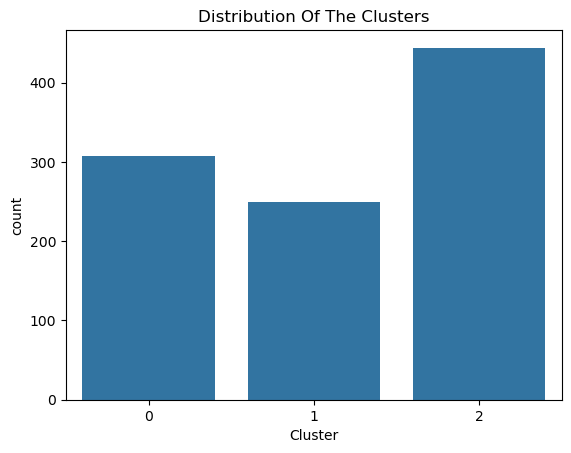

Cluster Distribution:
Cluster
2    444
0    307
1    249
Name: count, dtype: int64


In [72]:
# Cluster Distribution
pl = sns.countplot(x=data_pca_clustered['Cluster'])
pl.set_title("Distribution Of The Clusters")
plt.show()

print("Cluster Distribution:")
print(data_pca_clustered['Cluster'].value_counts())

In [73]:
# Cluster Mean
cluster_means = data_pca_clustered.groupby('Cluster')[['PCA1', 'PCA2']].mean()
cluster_means

,PCA1,PCA2
Cluster,,
0,-1.844982,0.011836
1,2.162327,0.015683
2,0.063041,-0.016979


# Hierarchical Clustering

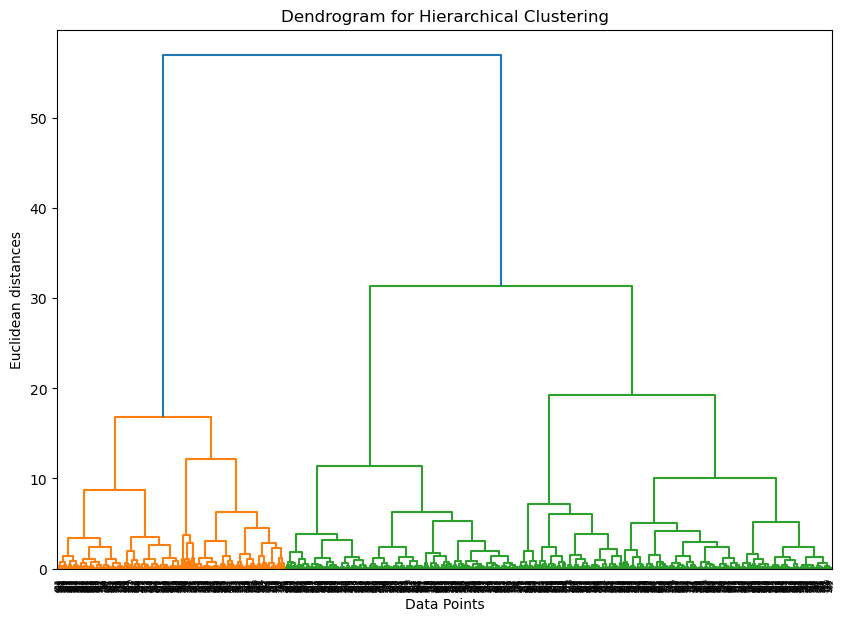

In [60]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

# Agglomerative Clustering

In [64]:
from sklearn.cluster import AgglomerativeClustering
# Agglomerative Clustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(data_pca)

# Adding the cluster labels to the PCA-transformed data for visualization
data_pca_clustered['Agglomerative Cluster'] = agg_labels

C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


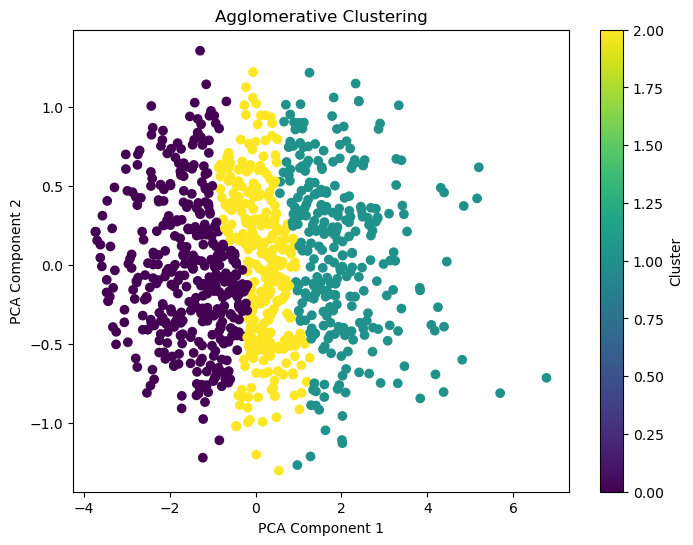

In [65]:
# Plotting the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_clustered['PCA1'], data_pca_clustered['PCA2'], c=data_pca_clustered['Agglomerative Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Comparison between the K-Means and Agglomerative Clustering

In [66]:
# Comparing the K-Means and Agglomerative Clustering using Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_k = silhouette_score(data_pca, clusters)
silhouette_hc = silhouette_score(data_pca, agg_labels)
print(f'Silhouette Score for K-Means clustering: {silhouette_k}')
print(f'Silhouette Score for Agglomerative clustering: {silhouette_hc}')

Silhouette Score for K-Means clustering: 0.42473280068966507
Silhouette Score for Agglomerative clustering: 0.346743001812894


In [67]:
# Comparing the K-Means and Agglomerative Clustering using Davies-Bouldin Score
from sklearn.metrics import davies_bouldin_score

db_score_kmeans = davies_bouldin_score(data_pca, clusters)
db_score_ag = davies_bouldin_score(data_pca, agg_labels)
print(f'Davies-Bouldin Score for K-Means clustering: {db_score_kmeans}')
print(f'Davies-Bouldin Score for Agglomerative clustering: {db_score_ag}')

Davies-Bouldin Score for K-Means clustering: 0.755411700192291
Davies-Bouldin Score for Agglomerative clustering: 0.8505856544051461
